<a href="https://colab.research.google.com/github/Gehlen05/sms-classifier-senior-sistemas/blob/main/sms_classifier_regressao_logistica_floresta_decisao_token_senior_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from ast import increment_lineno
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sms_senior.csv',  encoding= 'unicode_escape', delimiter=',')
df.head()

Mounted at /content/drive


,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Columns: 154 entries, Full_Text to IsSpam
dtypes: int64(151), object(3)
memory usage: 6.5+ MB


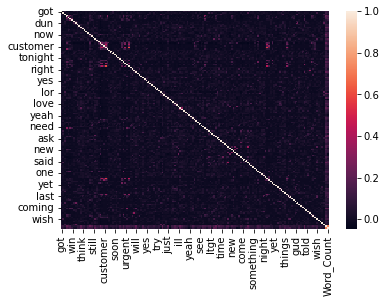

In [50]:
f, ax = plt.subplots()
sns.heatmap(df.corr());

In [51]:
df['scaled_date'] = pd.to_datetime(df['Date'])
df['scaled_time'] = pd.to_datetime(df['Date'])
df['scaled_date'] = df['scaled_date'].dt.strftime('%Y%m%d')
df['scaled_time'] =  df['scaled_time'].dt.strftime('%H%M%s')

In [52]:
rob_scaler = RobustScaler()
df['scaled_time'] = rob_scaler.fit_transform(df['scaled_time'].values.reshape(-1,1))
df['scaled_date'] = rob_scaler.fit_transform(df['scaled_date'].values.reshape(-1,1))
df['Common_Word_Count'] = rob_scaler.fit_transform(df['Common_Word_Count'].values.reshape(-1,1))
df['Word_Count'] = rob_scaler.fit_transform(df['Word_Count'].values.reshape(-1,1))
df.loc[df.IsSpam=='no','IsSpam']='0'
df.loc[df.IsSpam=='yes','IsSpam']='1'

In [53]:
vectorizer = CountVectorizer()
df_countvectorizer = vectorizer.fit_transform(df['Full_Text'])

In [54]:
df_countvectorizer.shape

(5574, 8720)

In [55]:
print(vectorizer.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '0093', '0094', '0096', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '087

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
df_full_text = pd.DataFrame(df_countvectorizer.toarray())

In [57]:
df_full_text.head()

,0,1,2,3,4,5,6,7,8,9,...,8710,8711,8712,8713,8714,8715,8716,8717,8718,8719
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.insert(1, 'date_norm', df['scaled_date'])
df.insert(2, 'time_norm', df['scaled_time'])
df.columns

Index(['Full_Text', 'date_norm', 'time_norm', 'got', 'great', 'wat', 'free',
       'text', 'txt', 'win',
       ...
       'leave', 'thing', 'many', 'wan', 'Common_Word_Count', 'Word_Count',
       'Date', 'IsSpam', 'scaled_date', 'scaled_time'],
      dtype='object', length=158)

In [59]:
df.drop(['time', 'scaled_date', 'scaled_time', 'Date', 'Full_Text'], axis=1, inplace=True)

In [60]:
df = pd.concat([df_full_text, df], axis = 1)

0    4827
1     747
Name: IsSpam, dtype: int64


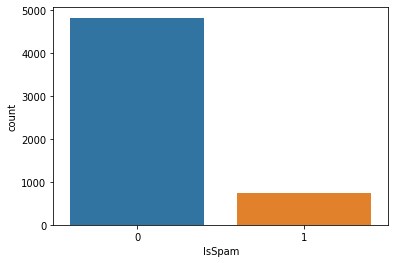

In [61]:
ax = sns.countplot(x='IsSpam',data=df)
print(df['IsSpam'].value_counts())

In [62]:
x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Columns: 8873 entries, 0 to IsSpam
dtypes: float64(4), int64(8868), object(1)
memory usage: 377.3+ MB


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [65]:
lr = LogisticRegression(max_iter=300, random_state=42)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisão: ', metrics.precision_score(y_test, y_pred, average='macro'))
print('Recall: ', metrics.recall_score(y_test, y_pred, average='macro'))
print('F1: ', metrics.f1_score(y_test, y_pred, average='macro'))

Acurácia:  0.9838565022421525
Precisão:  0.9842363309129274
Recall:  0.943796658371845
F1:  0.9627853678073961


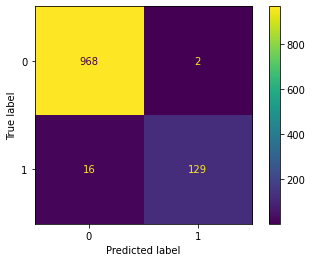

In [66]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [67]:
rf = RandomForestClassifier(max_depth = 12, random_state=42)

In [68]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisão: ', metrics.precision_score(y_test, y_pred, average='macro'))
print('Recall: ', metrics.recall_score(y_test, y_pred, average='macro'))
print('F1: ', metrics.f1_score(y_test, y_pred, average='macro'))


Acurácia:  0.9372197309417041
Precisão:  0.9663461538461539
Recall:  0.7586206896551724
F1:  0.8234961555857079


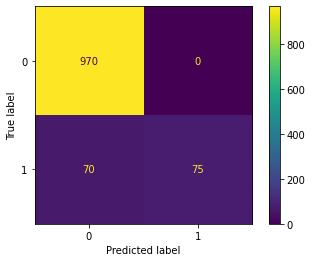

In [69]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()